<a href="https://colab.research.google.com/github/santoshF/python/blob/master/FinanceDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance DS

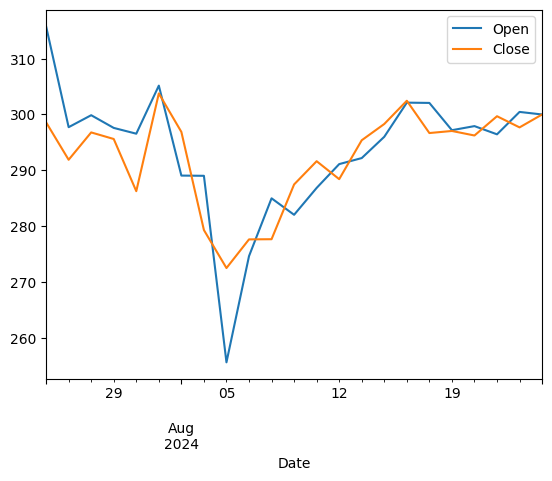

In [3]:
# prompt: write a code to get the latest stock exchange data for symbol ETN in a dataframe show a visualization of open and closed values limit data for current year

!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get the data for the stock ETN
etn = yf.Ticker("ETN")

# Get the historical prices for this year
etn_hist = etn.history(period="1mo")

# Extract the open and close prices
etn_open_close = etn_hist[["Open", "Close"]]

# Plot the open and close prices
etn_open_close.plot()
plt.show()


In [16]:
# show financials:
etn.calendar

{'Dividend Date': datetime.date(2024, 8, 23),
 'Ex-Dividend Date': datetime.date(2024, 8, 5),
 'Earnings Date': [datetime.date(2024, 10, 29), datetime.date(2024, 11, 4)],
 'Earnings High': 2.85,
 'Earnings Low': 2.73,
 'Earnings Average': 2.79,
 'Revenue High': 6424700000,
 'Revenue Low': 6295650000,
 'Revenue Average': 6372500000}

In [19]:
# show meta information about the history (requires history() to be called first)
etn.history_metadata

{'currency': 'USD',
 'symbol': 'ETN',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 76253400,
 'regularMarketTime': 1724443202,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 300.0,
 'fiftyTwoWeekHigh': 302.0,
 'fiftyTwoWeekLow': 297.78,
 'regularMarketDayHigh': 302.0,
 'regularMarketDayLow': 297.78,
 'regularMarketVolume': 1950062,
 'longName': 'Eaton Corporation plc',
 'shortName': 'Eaton Corporation, PLC',
 'chartPreviousClose': 321.94,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1724659200,
   'end': 1724679000,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1724679000,
   'end': 1724702400,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1724702400,
   'end': 1724716800,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': [

In [17]:
#etn.sec_filings
# - income statement
etn.income_stmt
etn.quarterly_income_stmt

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Tax Rate For Calcs,0.168,0.179,0.129596,0.173,0.17,NaN,NaN
Normalized EBITDA,1451000000.0,1256000000.0,1346000000.0,1341000000.0,1168000000.0,NaN,NaN
Total Unusual Items,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Total Unusual Items Excluding Goodwill,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,993000000.0,821000000.0,945000000.0,891000000.0,744000000.0,NaN,NaN
Reconciled Depreciation,227000000.0,225000000.0,231000000.0,229000000.0,228000000.0,NaN,NaN
Reconciled Cost Of Revenue,3940000000.0,3725000000.0,3732000000.0,3684000000.0,3747000000.0,NaN,NaN
EBITDA,1451000000.0,1256000000.0,1346000000.0,1341000000.0,1168000000.0,NaN,NaN
EBIT,1224000000.0,1031000000.0,1115000000.0,1112000000.0,940000000.0,NaN,NaN


In [18]:


# show actions (dividends, splits, capital gains)
etn.actions
etn.dividends
etn.splits
etn.capital_gains  # only for mutual funds & etfs

# show share count
etn.get_shares_full(start="2024-01-01", end=None)



# - balance sheet
etn.balance_sheet
etn.quarterly_balance_sheet
# - cash flow statement
etn.cashflow
etn.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
etn.major_holders
etn.institutional_holders
etn.mutualfund_holders
etn.insider_transactions
etn.insider_purchases
etn.insider_roster_holders

etn.sustainability

# show recommendations
etn.recommendations
etn.recommendations_summary
etn.upgrades_downgrades

# show analysts data
#etn.analyst_price_targets
#etn.earnings_estimate
#etn.revenue_estimate
#etn.earnings_history
#etn.eps_trend
#etn.eps_revisions
#etn.growth_estimates

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use etn.get_earnings_dates(limit=XX) with increased limit argument.
etn.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
etn.isin

# show options expirations
etn.options

# show news
#etn.news

# get option chain for specific expiration
#opt = etn.option_chain('2024-08-26')
# data available via: opt.calls, opt.puts

('2024-09-20',
 '2024-10-18',
 '2025-01-17',
 '2025-04-17',
 '2025-06-20',
 '2026-01-16')

In [ ]:
etn.info

{'address1': 'Eaton House',
 'address2': '30 Pembroke Road',
 'city': 'Dublin',
 'zip': 'D04 Y0C2',
 'country': 'Ireland',
 'phone': '353 1 637 2900',
 'website': 'https://www.eaton.com',
 'industry': 'Specialty Industrial Machinery',
 'industryKey': 'specialty-industrial-machinery',
 'industryDisp': 'Specialty Industrial Machinery',
 'sector': 'Industrials',
 'sectorKey': 'industrials',
 'sectorDisp': 'Industrials',
 'longBusinessSummary': "Eaton Corporation plc operates as a power management company worldwide. The company's Electrical Americas and Electrical Global segment provides electrical components, industrial components, power distribution and assemblies, residential products, single and three phase power quality and connectivity products, wiring devices, circuit protection products, utility power distribution products, power reliability equipment, and services, as well as hazardous duty electrical equipment, emergency lighting, fire detection, explosion-proof instrumentation, 